# Sobre o conjunto de dados

## Informações básicas

O conjunto de dados CICIDS2017 contém os ataques comuns benignos e mais atualizados, que se assemelham aos dados do mundo real (PCAPs). Também inclui os resultados da análise de tráfego de rede usando o CICFlowMeter com fluxos rotulados com base no carimbo de data/hora, IPs de origem e destino, portas de origem e destino, protocolos e ataque (arquivos CSV). Também está disponível a definição de recursos extraídos.

Gerar tráfego em segundo plano realista foi nossa principal prioridade na construção desse conjunto de dados. Usamos nosso sistema B-Profile proposto (Sharafaldin, et al. 2016) para perfilar o comportamento abstrato das interações humanas e gerar tráfego de fundo naturalista benigno. Para este conjunto de dados, construímos o comportamento abstrato de 25 usuários com base nos protocolos HTTP, HTTPS, FTP, SSH e email.

O período de captura de dados teve início às 9h de segunda-feira, 3 de julho de 2017, e terminou às 17h de sexta-feira, 7 de julho de 2017, totalizando 5 dias. Segunda-feira é o dia normal e inclui apenas tráfego benigno. Os ataques implementados incluem Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet e DDoS. Eles foram executados de manhã e à tarde na terça, quarta, quinta e sexta-feira.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report

In [2]:
datasets = ['Monday-WorkingHours.pcap_ISCX.csv','Tuesday-WorkingHours.pcap_ISCX.csv',
                                 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
                                 'Wednesday-workingHours.pcap_ISCX.csv',
                                 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
                                 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 
                                 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 
                                 'Friday-WorkingHours-Morning.pcap_ISCX.csv'
                                  ]

In [3]:
dfs = list()
for i in range(len(datasets)):
    dfs.append(pd.read_csv(datasets[i]))

In [4]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529918 entries, 0 to 529917
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             529918 non-null  int64  
 1    Flow Duration                529918 non-null  int64  
 2    Total Fwd Packets            529918 non-null  int64  
 3    Total Backward Packets       529918 non-null  int64  
 4   Total Length of Fwd Packets   529918 non-null  int64  
 5    Total Length of Bwd Packets  529918 non-null  int64  
 6    Fwd Packet Length Max        529918 non-null  int64  
 7    Fwd Packet Length Min        529918 non-null  int64  
 8    Fwd Packet Length Mean       529918 non-null  float64
 9    Fwd Packet Length Std        529918 non-null  float64
 10  Bwd Packet Length Max         529918 non-null  int64  
 11   Bwd Packet Length Min        529918 non-null  int64  
 12   Bwd Packet Length Mean       529918 non-nul

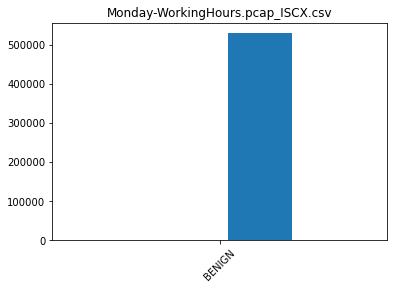

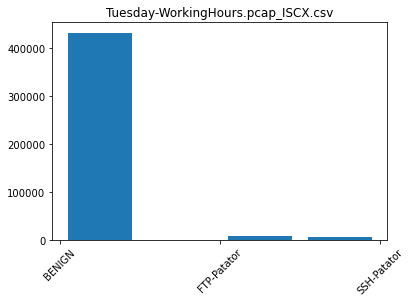

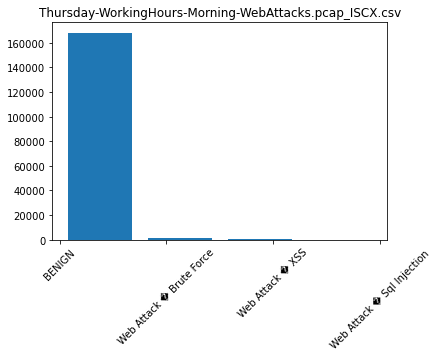

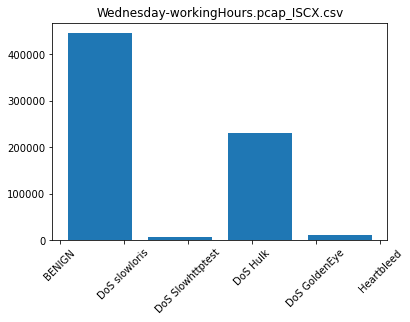

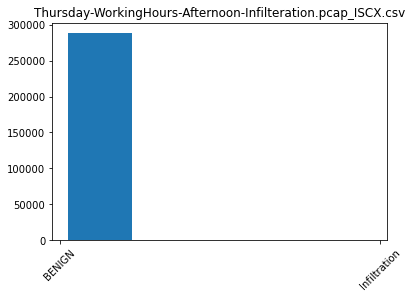

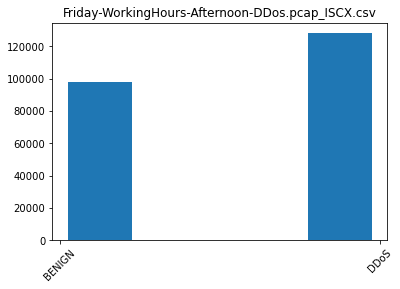

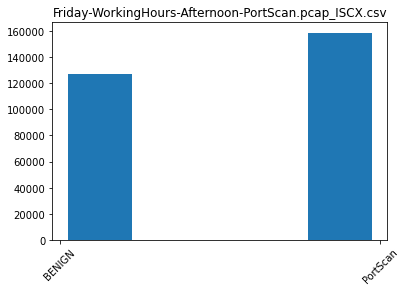

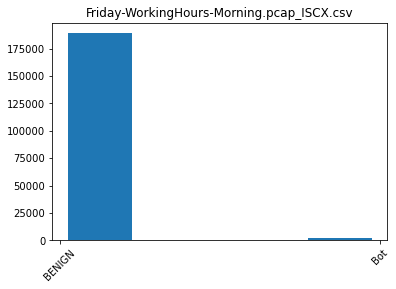

In [5]:
for i in range(len(dfs)):
    plt.title(datasets[i])
    plt.hist(dfs[i][' Label'], bins=4, rwidth=0.8) 
    plt.xticks(rotation=45)
    plt.show()

## Descrição dos Identificadores

In [6]:
df = pd.concat(map(pd.read_csv, ['Monday-WorkingHours.pcap_ISCX.csv','Tuesday-WorkingHours.pcap_ISCX.csv',
                                 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
                                 'Wednesday-workingHours.pcap_ISCX.csv',
                                 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
                                 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 
                                 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 
                                 'Friday-WorkingHours-Morning.pcap_ISCX.csv'
                                  ]), ignore_index=True)

In [7]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
df.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [10]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [11]:
df.rename(columns={' Label': 'Label'}, inplace = True)

## 2. Análise e Visualização de Dados

- Após analisar as distribuições dos tipos de dados, você pode criar um histograma para analisar as ditribuições dos atributos numérico.

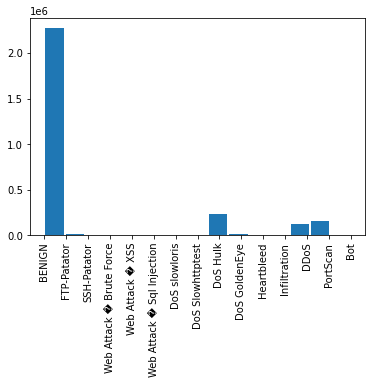

In [12]:
plt.hist(df['Label'], bins=15, rwidth=0.9) 
plt.xticks(rotation=90)
plt.show()

In [13]:
df['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

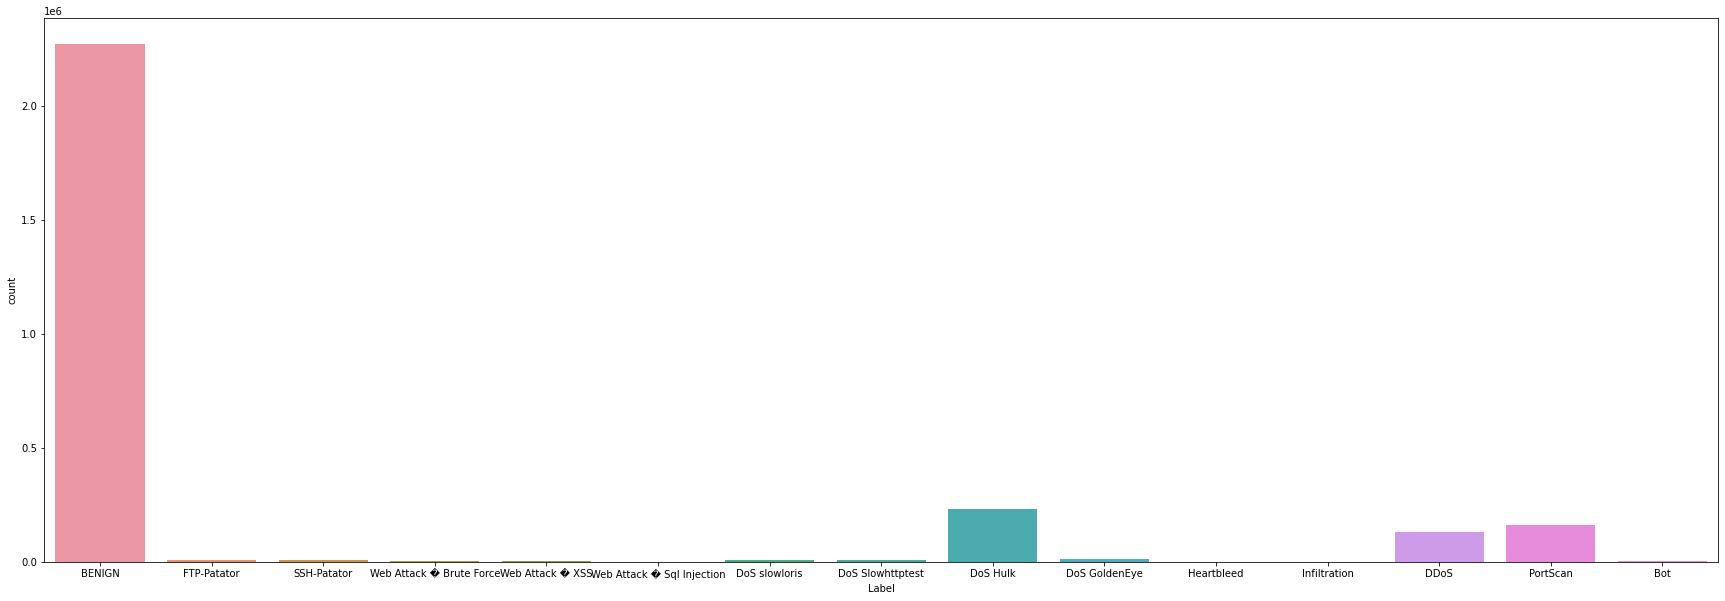

In [14]:
ax = sns.countplot(x="Label",data=df)
ax.figure.set_size_inches(30, 10)

Benign, Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet e DDoS

In [15]:
#Transformando em binario

df['Label'][df['Label']!='BENIGN']=1
df['Label'][df['Label']=='BENIGN']=0

C:\Users\rafae\AppData\Local\Temp\ipykernel_51244\3576367467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rafae\AppData\Local\Temp\ipykernel_51244\3576367467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
df['Label']

0          0
1          0
2          0
3          0
4          0
          ..
2830738    0
2830739    0
2830740    0
2830741    0
2830742    0
Name: Label, Length: 2830743, dtype: object

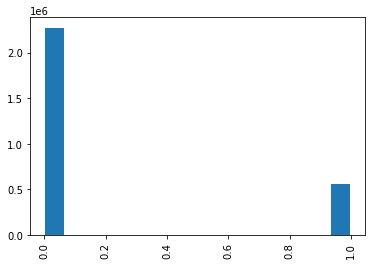

In [39]:
plt.hist(df['Label'], bins=15, rwidth=0.9) 
plt.xticks(rotation=90)
plt.show()

In [17]:
df['Label'].value_counts()

0    2273097
1     557646
Name: Label, dtype: int64

In [18]:
df_new = df.copy()

In [19]:
df_new = df_new.astype(float)

In [20]:
df_new

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49188.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49188.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49188.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49486.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53.0,61452.0,4.0,2.0,180.0,354.0,45.0,45.0,45.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2830739,53.0,171.0,2.0,2.0,80.0,272.0,40.0,40.0,40.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2830740,53.0,222.0,2.0,2.0,90.0,354.0,45.0,45.0,45.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2830741,123.0,16842.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Verificando Correlação entre as colunas numericas com o Preco

corr = df_new.corrwith(df_new['Label'])
corr.sort_values(ascending=False)

Label                      1.000000
 Bwd Packet Length Std     0.510216
Bwd Packet Length Max      0.492007
 Bwd Packet Length Mean    0.484189
 Avg Bwd Segment Size      0.484189
                             ...   
 Fwd Avg Packets/Bulk           NaN
 Fwd Avg Bulk Rate              NaN
 Bwd Avg Bytes/Bulk             NaN
 Bwd Avg Packets/Bulk           NaN
Bwd Avg Bulk Rate               NaN
Length: 79, dtype: float64

In [22]:
correlated_columns = corr[corr > 0.2]
correlated_columns.sort_values(ascending=False)

Label                      1.000000
 Bwd Packet Length Std     0.510216
Bwd Packet Length Max      0.492007
 Bwd Packet Length Mean    0.484189
 Avg Bwd Segment Size      0.484189
 Packet Length Std         0.470252
 Max Packet Length         0.454054
 Packet Length Variance    0.453847
 Fwd IAT Std               0.422755
 Packet Length Mean        0.414059
 Average Packet Size       0.413037
 Idle Max                  0.394220
Idle Mean                  0.390470
 Flow IAT Max              0.388666
 Fwd IAT Max               0.388642
 Idle Min                  0.380651
 Flow IAT Std              0.336720
Fwd IAT Total              0.215468
 Flow Duration             0.213864
dtype: float64

## Divisão em treino e teste 

In [23]:
data = df_new.values
#.sample(frac=0.5)

In [24]:
data

array([[4.9188e+04, 4.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.9188e+04, 1.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.9188e+04, 1.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [5.3000e+01, 2.2200e+02, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2300e+02, 1.6842e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.3000e+01, 1.5300e+02, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [25]:
data.shape

(2830743, 79)

In [26]:
data = np.delete(data, np.isinf(data).any(axis=1), axis=0)

In [27]:
data.shape

(2827876, 79)

In [28]:
X = data[:,0:78]
Y = data[:,78]

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, train_size=0.7)

In [30]:
tamanho=Xtrain.shape
tamanho

(1979513, 78)

In [31]:
Ytrain.shape

(1979513,)

In [32]:
data.shape

(2827876, 79)

In [33]:
#Normalização dos dados

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train_normal = scaler.fit_transform(Xtrain)
X_test_normal = scaler.transform(Xtest)

In [35]:
# RandomForestClassifier

forest_reg = RandomForestClassifier()

# Treinando o modelo
forest_reg.fit(X_train_normal, Ytrain)
   
# Realizando predição com treino e teste
forest_reg.score(X_train_normal, Ytrain), forest_reg.score(X_test_normal, Ytest)

(0.9994832062229447, 0.9990581861773793)

In [44]:
y_pred_proba = forest_reg.predict_proba(X_test_normal)
y_pred_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

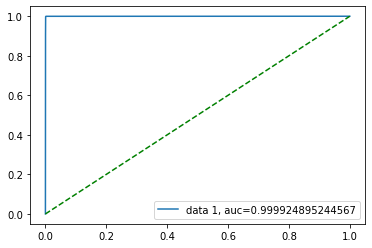

In [45]:
#Curva ROC RF

y_pred_proba = forest_reg.predict_proba(X_test_normal)[::,1]
fpr, tpr, _ = metrics.roc_curve(Ytest,  y_pred_proba)
auc = metrics.roc_auc_score(Ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.legend(loc=4)
plt.show()

In [40]:
#DecisionTree

DT =DecisionTreeClassifier(max_features=5, max_depth=4)

# treinando o modelo
DT.fit(X_train_normal, Ytrain)

# Realizando predição com treino e teste

DT.score(X_train_normal, Ytrain), DT.score(X_test_normal, Ytest)

(0.931439197418759, 0.9319560141118837)

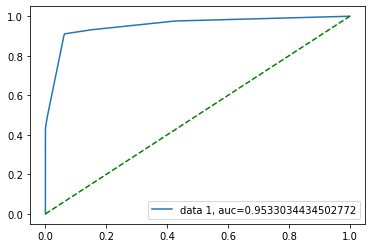

In [46]:
#Curva ROC DT

y_pred_probadt = DT.predict_proba(X_test_normal)[::,1]
fpr, tpr, _ = metrics.roc_curve(Ytest,  y_pred_probadt)
auc = metrics.roc_auc_score(Ytest, y_pred_probadt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.legend(loc=4)
plt.show()

[Text(0.5, 0.9, 'X[55] <= 0.001\ngini = 0.317\nsamples = 1979513\nvalue = [1589247, 390266]'),
 Text(0.25, 0.7, 'X[6] <= -0.282\ngini = 0.232\nsamples = 1239237\nvalue = [1072972, 166265]'),
 Text(0.125, 0.5, 'X[40] <= -0.557\ngini = 0.484\nsamples = 374937\nvalue = [220914, 154023]'),
 Text(0.0625, 0.3, 'X[37] <= -0.183\ngini = 0.324\nsamples = 214643\nvalue = [171048, 43595]'),
 Text(0.03125, 0.1, 'gini = 0.489\nsamples = 95469\nvalue = [54663, 40806]'),
 Text(0.09375, 0.1, 'gini = 0.046\nsamples = 119174\nvalue = [116385, 2789]'),
 Text(0.1875, 0.3, 'X[37] <= -0.066\ngini = 0.429\nsamples = 160294\nvalue = [49866, 110428]'),
 Text(0.15625, 0.1, 'gini = 0.024\nsamples = 25324\nvalue = [25015, 309]'),
 Text(0.21875, 0.1, 'gini = 0.3\nsamples = 134970\nvalue = [24851, 110119]'),
 Text(0.375, 0.5, 'X[21] <= -0.274\ngini = 0.028\nsamples = 864300\nvalue = [852058, 12242]'),
 Text(0.3125, 0.3, 'X[38] <= -0.608\ngini = 0.01\nsamples = 781756\nvalue = [777659, 4097]'),
 Text(0.28125, 0.1, '

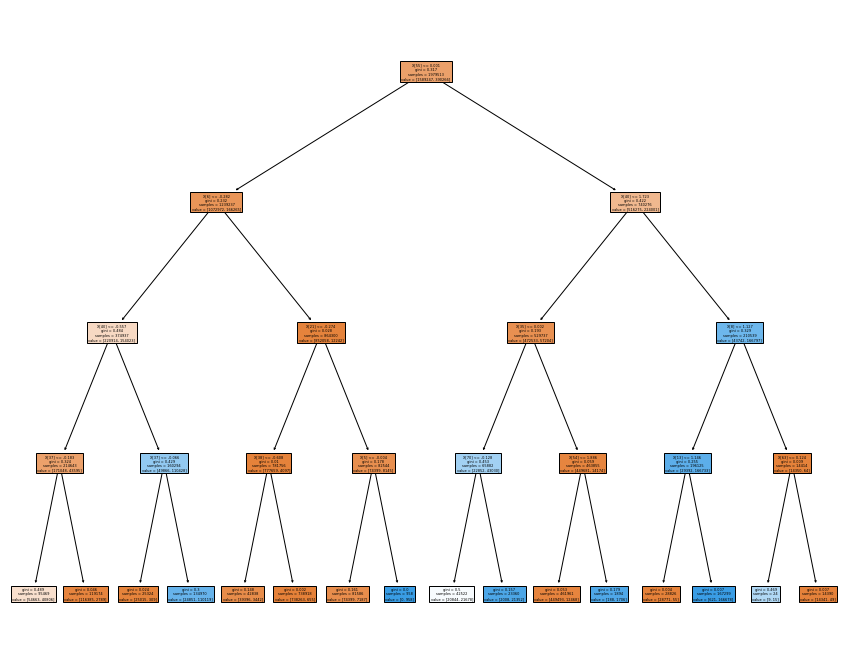

In [38]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)